In [1]:
import networkx as nx
import community
from community import community_louvain
import numpy as np
import copy  
import matplotlib.pyplot as plt
import collections

In [2]:
file_108 = r'/Users/z/Desktop/execs_email_t108.txt'
file_109 = r'/Users/z/Desktop/execs_email_t109.txt'


In [17]:
G_108 = nx.read_weighted_edgelist(file_108, comments='#', delimiter=' ', create_using=None, nodetype=str,  encoding='utf-8')
G_109 = nx.read_weighted_edgelist(file_109, comments='#', delimiter=' ', create_using=None, nodetype=str,  encoding='utf-8')


In [1]:
print(G_108.size())
print(G_108.number_of_nodes())
print(G_109.size())
print(G_109.number_of_nodes())

NameError: name 'G_108' is not defined

In [16]:
G = G_108
tot_degree_sequence_108 = [d for n, d in G.degree()]  # degree sequence

G = G_109
tot_degree_sequence_109 = [d for n, d in G.degree()]  # degree sequence


(0, 60)

<Figure size 432x288 with 0 Axes>

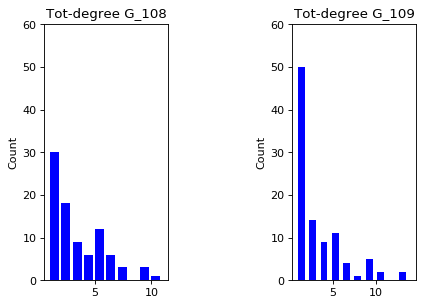

In [36]:
fig = plt.figure()
#fig.tight_layout()
plt.figure(figsize=(6, 4), dpi=80)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 1   # the amount of width reserved for blank space between subplots
hspace = 1   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)



plt.subplot(1, 2, 1)
plt.hist(tot_degree_sequence_108, width=0.80, color='b')
plt.title("Tot-degree G_108")
plt.ylabel("Count")
#plt.xlabel("Out Degree")
plt.ylim(0, 60)

plt.subplot(1, 2, 2)
plt.hist(tot_degree_sequence_109, width=0.80, color='b')
plt.title("Tot-degree G_109")
plt.ylabel("Count")
#plt.xlabel("In Degree")
plt.ylim(0, 60)

In [20]:
def degtrim_max(G, max_threshold):
    tmpG = copy.deepcopy(G)

    for vertex in G.nodes():
        if G.degree[vertex] >= max_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

def degtrim_min(G, min_threshold):
    tmpG = copy.deepcopy(G)

    for vertex in G.nodes():
        if G.degree[vertex] <= min_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

In [75]:

Graph = copy.deepcopy(G_108)
louvain_108 = community.best_partition(Graph, resolution=1, randomize=False)
mod_108 = community.modularity(louvain_108, Graph)
print(mod_108)




0.7797091262975778


In [76]:
Graph = copy.deepcopy(G_109)
louvain_109 = community.best_partition(Graph, resolution=1, randomize=False)
mod_109 = community.modularity(louvain_109, Graph)
print(mod_109)

0.6730294672666571


In [74]:
#G_raw = G_109
graphs_modularity1 = []
graphs_maxdeg = []
max_deg_list = [20, 15, 14, 13, 12, 11, 10, 9]

G_trimmed_new = G_109
for max_deg in max_deg_list:
    Gtrim_mod = degtrim_max(G_trimmed_new, max_deg)
    G_trimmed_new = Gtrim_mod.G
    graphs_maxdeg.append(max_deg)
    graphs_modularity1.append(Gtrim_mod.mod) 

print (graphs_modularity1)
print (graphs_maxdeg)

[0.6730294672666571, 0.6730294672666571, 0.7034496191135734, 0.7034496191135734, 0.7290880740405411, 0.7290880740405411, 0.7669309325450148, 0.8029211371289844]
[20, 15, 14, 13, 12, 11, 10, 9]


In [51]:
graphs_modularity2 = []
graphs_mindeg = []
min_deg_list = [1, 2, 3, 4, 5]
G_trimmed_new = G_109
for min_deg in min_deg_list:
    Gtrim_mod = degtrim_min(G_trimmed_new, min_deg)
    G_trimmed_new = Gtrim_mod.G
    graphs_mindeg.append(min_deg)
    graphs_modularity2.append(Gtrim_mod.mod) 

print (graphs_modularity2)
print (graphs_mindeg)

[0.5950363559882219, 0.525326797385621, 0.46474358974358976, 0.30898668639053256, 0.12326869806094183]
[1, 2, 3, 4, 5]


In [40]:
def degcentralitytrim_max(G, max_threshold):
    tmpG = copy.deepcopy(G)
    degree_centrality_dict = nx.degree_centrality(G)
    for vertex in degree_centrality_dict:
        if degree_centrality_dict[vertex] >= max_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

def degcentralitytrim_min(G, min_threshold):
    tmpG = copy.deepcopy(G)
    degree_centrality_dict = nx.degree_centrality(G)
    for vertex in degree_centrality_dict:
        if degree_centrality_dict[vertex] <= min_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

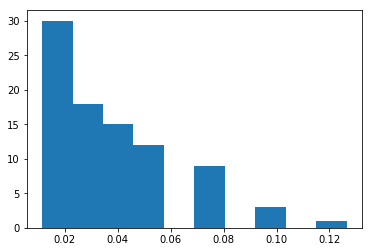

In [41]:
deg_centrality_dict = nx.degree_centrality(G_raw)

degree_centrality_list = []
for vertex in deg_centrality_dict:
    degree_centrality_list.append(deg_centrality_dict[vertex])



plt.hist(degree_centrality_list)
plt.show()

In [49]:
graphs_modularity3 = []
graphs_maxdegcentrality = []
max_degcentrality_list = [0.14, 0.12, 0.10, 0.08, 0.06, 0.04]

G_trimmed_new = G_109
for max_degcentrality in max_degcentrality_list:
    Gtrim_mod = degcentralitytrim_max(G_trimmed_new, max_degcentrality)
    G_trimmed_new = Gtrim_mod.G
    graphs_maxdegcentrality.append(max_degcentrality)
    graphs_modularity3.append(Gtrim_mod.mod) 

print (graphs_modularity3)
print (graphs_maxdegcentrality)

[0.7034496191135734, 0.7290880740405411, 0.7669309325450148, 0.8427217825905874, 0.9073777777777778, 0.9130752373995615]
[0.14, 0.12, 0.1, 0.08, 0.06, 0.04]


In [50]:
graphs_modularity4 = []
graphs_mindegcentarlity = []
min_degcentrality_list = [0.008, 0.01, 0.02, 0.03, 0.04, 0.05]
G_trimmed_new = G_109
for min_degcentrality in min_degcentrality_list:
    Gtrim_mod = degcentralitytrim_min(G_trimmed_new, min_degcentrality)
    G_trimmed_new = Gtrim_mod.G
    graphs_mindegcentarlity.append(min_degcentrality)
    graphs_modularity4.append(Gtrim_mod.mod) 

print (graphs_modularity4)
print (graphs_mindegcentarlity)

[0.6730294672666571, 0.6730294672666571, 0.5950363559882219, 0.5827034517510706, 0.52595, 0.5214263850627487]
[0.008, 0.01, 0.02, 0.03, 0.04, 0.05]


In [48]:
def btwncentralitytrim_max(G, max_threshold):
    tmpG = copy.deepcopy(G)
    btwn_centrality_dict = nx.betweenness_centrality(G)
    for vertex in btwn_centrality_dict:
        if btwn_centrality_dict[vertex] >= max_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

def btwncentralitytrim_min(G, min_threshold):
    tmpG = copy.deepcopy(G)
    btwn_centrality_dict = nx.betweenness_centrality(G)
    for vertex in btwn_centrality_dict:
        if btwn_centrality_dict[vertex] <= min_threshold:
            tmpG.remove_node(vertex)

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

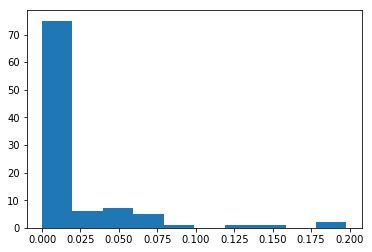

In [52]:
btwn_centrality_dict = nx.betweenness_centrality(G_109)

btwn_centrality_list = []
for vertex in btwn_centrality_dict:
    btwn_centrality_list.append(btwn_centrality_dict[vertex])



plt.hist(btwn_centrality_list)
plt.show()

In [63]:
graphs_modularity5 = []
graphs_maxbtwncentrality = []
max_btwncentrality_list = [0.2, 0.18, 0.15, 0.08, 0.07, 0.06, 0.05]

G_trimmed_new = G_109
for max_btwncentrality in max_btwncentrality_list:
    Gtrim_mod = btwncentralitytrim_max(G_trimmed_new, max_btwncentrality)
    G_trimmed_new = Gtrim_mod.G
    graphs_maxbtwncentrality.append(max_btwncentrality)
    graphs_modularity5.append(Gtrim_mod.mod) 

print (graphs_modularity5)
print (graphs_maxbtwncentrality)

[0.6730294672666571, 0.7290880740405411, 0.7367455621301775, 0.7641427035743079, 0.7641427035743079, 0.7641427035743079, 0.7641427035743079]
[0.2, 0.18, 0.15, 0.08, 0.07, 0.06, 0.05]


In [64]:
graphs_modularity6 = []
graphs_minbtwncentrality = []
min_btwncentrality_list = [0.001, 0.0015, 0.002, 0.003, 0.004]

G_trimmed_new = G_raw
for min_btwncentrality in min_btwncentrality_list:
    Gtrim_mod = btwncentralitytrim_min(G_trimmed_new, min_btwncentrality)
    G_trimmed_new = Gtrim_mod.G
    graphs_minbtwncentrality.append(min_btwncentrality)
    graphs_modularity6.append(Gtrim_mod.mod) 

print (graphs_modularity6)
print (graphs_minbtwncentrality)

[0.6549167533818937, 0.5978125, 0.5618512110726643, 0.5449999999999999, 0.5392390011890607]
[0.001, 0.0015, 0.002, 0.003, 0.004]


<Figure size 432x288 with 0 Axes>

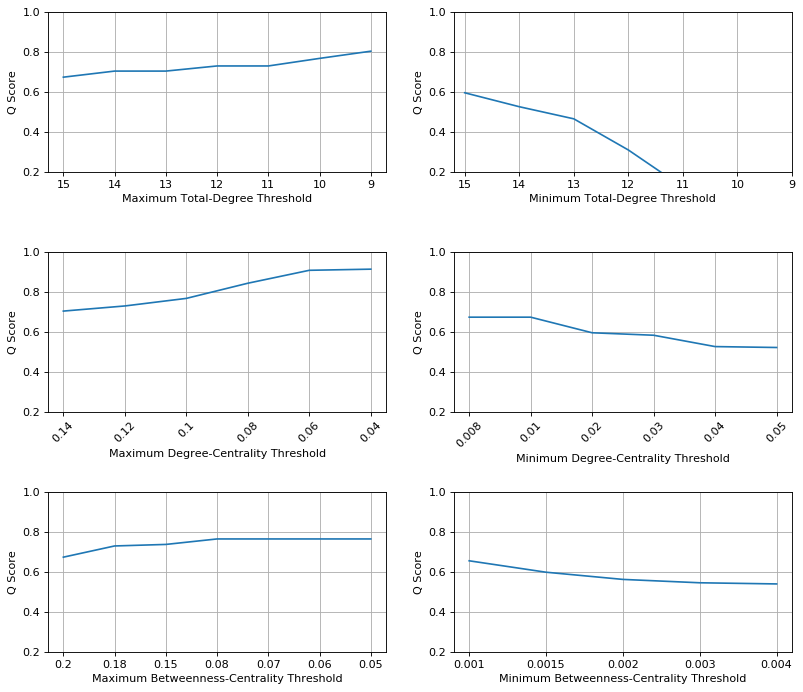

In [69]:
fig = plt.figure()
#fig.tight_layout()
plt.figure(figsize=(12, 10), dpi=80)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


plt.subplot(3, 2, 1)
plt.plot(graphs_modularity1)
plt.xticks(np.arange(len(graphs_mindeg)), graphs_mindeg)
plt.ylabel('Q Score')
plt.xlabel('Maximum Total-Degree Threshold')
plt.grid(True)
plt.ylim((0.20,1.00))

plt.subplot(3, 2, 2)
plt.plot(graphs_modularity2)
plt.xticks(np.arange(len(graphs_maxdeg)), graphs_maxdeg)
plt.ylabel('Q Score')
plt.xlabel('Minimum Total-Degree Threshold')
plt.grid(True)
plt.ylim((0.20,1.00))


plt.subplot(3, 2, 3)
plt.plot(graphs_modularity3)
plt.xticks(np.arange(len(graphs_maxdegcentrality)), graphs_maxdegcentrality, rotation=45)
plt.ylabel('Q Score')
plt.xlabel('Maximum Degree-Centrality Threshold')
plt.grid(True)
plt.ylim((0.20,1.00))

plt.subplot(3, 2, 4)
plt.plot(graphs_modularity4)
plt.xticks(np.arange(len(graphs_mindegcentarlity)), graphs_mindegcentarlity, rotation=45)
plt.ylabel('Q Score')
plt.xlabel('Minimum Degree-Centrality Threshold')
plt.grid(True)
plt.ylim((0.20,1.00))

plt.subplot(3, 2, 5)
plt.plot(graphs_modularity5)
plt.xticks(np.arange(len(graphs_maxbtwncentrality)), graphs_maxbtwncentrality)
plt.ylabel('Q Score')
plt.xlabel('Maximum Betweenness-Centrality Threshold')
plt.grid(True)
plt.ylim((0.20,1.00))

plt.subplot(3, 2, 6)
plt.plot(graphs_modularity6)
plt.xticks(np.arange(len(graphs_minbtwncentrality)), graphs_minbtwncentrality)
plt.ylabel('Q Score')
plt.xlabel('Minimum Betweenness-Centrality Threshold')
plt.grid(True)
plt.ylim((0.20,1.00))


plt.show()

In [ ]:
def edgetrim_max(G, max_threshold):
    tmpG = copy.deepcopy(G) 
    for edge in G.edges():
        if G.edges[edge]['weight'] >= max_threshold:
            tmpG.remove_edge(edge[0], edge[1])

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result

def edgetrim_min(G, min_threshold):
    tmpG = copy.deepcopy(G) 
    for edge in G.edges():
        if G.edges[edge]['weight'] <= min_threshold:
            tmpG.remove_edge(edge[0], edge[1]

    Graph = copy.deepcopy(tmpG)
    louvain = community.best_partition(Graph, resolution=1, randomize=False)
    mod = community.modularity(louvain, Graph)

    embedded = collections.namedtuple('embedded', 'G mod')
    result = embedded(G = Graph, mod = mod)

    return result